<a href="https://colab.research.google.com/github/tomersk/python-applications/blob/main/06_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Groundwater model - Ambhas

A simple one dimensional (lumped) groundwater equation can be written as:

$\frac{dh}{dt} = -(1-pd)h + \frac{R - Q}{S_y}$

where, $pd$ is the parameter for discharge (pd=0 means 0 discharge), $h$ is the groundwater level, $t$ is time, $R$ is recharge to the groundwater, $Q$ is groundwater draft and $S_y$ is specific yield.

We assume that baseflow (discharg) will be 0, when $h$ drops below $h_{min}$. Equation can be re-written as,

if $h>h_{min}$:

$\frac{dh}{dt} = -(1-pd)(h-h_{min}) + \frac{R - Q}{S_y}$

else:

$\frac{dh}{dt} = \frac{R - Q}{S_y}$

Let us implement the groundwater model.

In [113]:
from scipy.integrate import odeint 
import numpy as np
import matplotlib.pyplot as plt

def ambhas_model(h0, t, rf, sy, hmin, pd, rain, Q):
  if h0>hmin:
    dh_dt = -(pd)*(h0-hmin) + (rf*rain - Q)/sy
  else:
    dh_dt = (rf*rain - Q)/sy
  #print(dh_dt)
  return(dh_dt)

## Synthetic forcing

Let us create some synthetic data for rainfall. If you have measured data over a location, you can use that one.

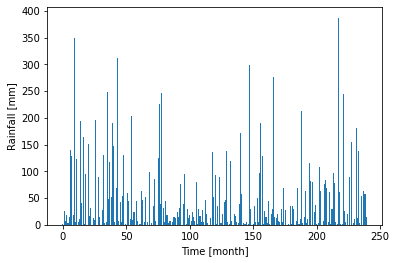

In [114]:
max_t = 20*12 # 20 years of monthly data
rain = np.random.gamma(shape=0.5, scale=80.0, size=max_t)

plt.bar(range(max_t), rain)
plt.ylabel("Rainfall [mm]")
plt.xlabel("Time [month]")
plt.show()

rain = rain/1000 # convert from mm to m

## Sensitivity of parameters

We will take the following default parameters to demonstrate the sensitivity of each of the parameters. Let us run the model with the default parameters and plot the simulated
groundwater levels.

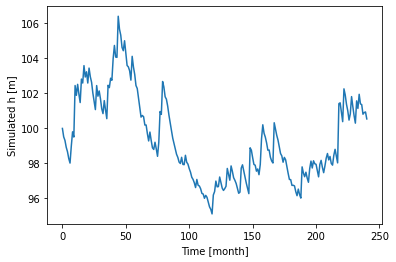

In [115]:
sy = 0.01
pd = 0.05 # parameter for discharge, 0 means no discharge
hmin = 90 # Discharge is zero, if groundwater table is below this level
rf = 0.1

Q = np.zeros(max_t,)

h = np.empty(max_t+1,)
h[0] = 100 # intial condition

for i in range(max_t):
  tspan = [i,i+1]
  # solve for next step
  h[i+1] = odeint(ambhas_model,h[i],tspan,args=(rf,sy,hmin,pd,rain[i],Q[i]), hmax=0.1)[1]
  
plt.plot(h)
plt.xlabel("Time [month]")
plt.ylabel("Simulated h [m]")
plt.show()

As you can see in the above plot, $h$ (simulated groundwater level) is fluctuating around approximately the initial groundwater level. This suggests, in this case, over a long temporal period the recharge and discharge are the same,
which is usually the case in a natural system.


Now, let uss try to change the different parameters and see how they impact the behaviour of $h$. 

### Specific yield
Let us first try to reduce it:
sy <- 0.001

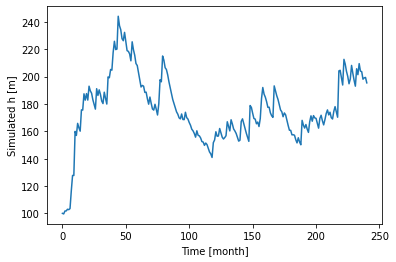

In [116]:
sy = 0.001
pd = 0.05 # parameter for discharge, 0 means no discharge
hmin = 90 # Discharge is zero, if groundwater table is below this level
rf = 0.1

Q = np.zeros(max_t,)

h = np.empty(max_t+1,)
h[0] = 100 # intial condition

for i in range(max_t):
  tspan = [i,i+1]
  # solve for next step
  h[i+1] = odeint(ambhas_model,h[i],tspan,args=(rf,sy,hmin,pd,rain[i],Q[i]), hmax=0.1)[1]
  
plt.plot(h)
plt.xlabel("Time [month]")
plt.ylabel("Simulated h [m]")
plt.show()

Following major changes have taken place:

* The $h$ at the end of simulation is much higher than the $h_0$ (initial groundwater level). It means net input is positive or recharge is higher than discharge. Since, we have made no change in the recharge, the discharge has been reduced drastically. Discharge is equal to, 

  $ discharge = S_y \times pd \times (h − h_{min})$ 

  First term on the R.H.S. contains $S_y$ as multiplier, so any reduction in $S_y$ will reduce the discharge. Please note that if $h$ is lower than $h_{min}$ then discharge is 0 and $S_y$ will play no role.

* In the early period, $h$ is showing increasing trend, howver after certain months, the $h$ has stabilized (fluctuating around same level). Because, any increase in $h$ increases the (recall previous discharge equation) discharge and when it
approximately matches the recharge, it starts stabilizing.

* The magnitude of fluctuations have increased significantly.The groundwater equation can be written as,

  $\Delta h = \frac{net recharge − discharge}{S_y}$
  
  Any change in sy will inversly impact the fluctuations in groundwater level ($\Delta h$). However, remember that discharge is also a function of $S_y$, so this
calculation is not so staightforward. 

Now, let us try to increase the $S_y$,

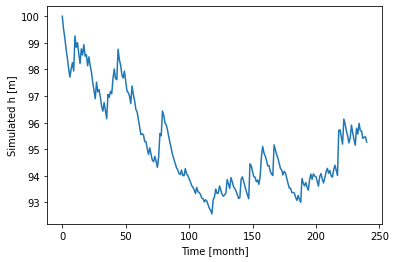

In [117]:
sy = 0.02
pd = 0.05 # parameter for discharge, 0 means no discharge
hmin = 90 # Discharge is zero, if groundwater table is below this level
rf = 0.1

Q = np.zeros(max_t,)

h = np.empty(max_t+1,)
h[0] = 100 # intial condition

for i in range(max_t):
  tspan = [i,i+1]
  # solve for next step
  h[i+1] = odeint(ambhas_model,h[i],tspan,args=(rf,sy,hmin,pd,rain[i],Q[i]), hmax=0.1)[1]
  
plt.plot(h)
plt.xlabel("Time [month]")
plt.ylabel("Simulated h [m]")
plt.show()

Now, you can see approximately the opposite behaviour of previous figure. The impact can be quantified in similar way

### Recharge factor
Let us increase the recharge factor:

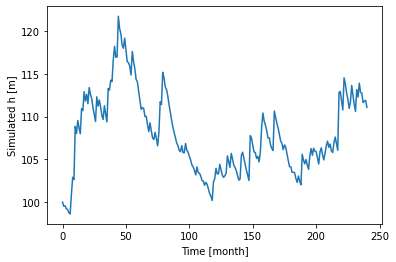

In [118]:
sy = 0.01
pd = 0.05 # parameter for discharge, 0 means no discharge
hmin = 90 # Discharge is zero, if groundwater table is below this level
rf = 0.2

Q = np.zeros(max_t,)

h = np.empty(max_t+1,)
h[0] = 100 # intial condition

for i in range(max_t):
  tspan = [i,i+1]
  # solve for next step
  h[i+1] = odeint(ambhas_model,h[i],tspan,args=(rf,sy,hmin,pd,rain[i],Q[i]), hmax=0.1)[1]
  
plt.plot(h)
plt.xlabel("Time [month]")
plt.ylabel("Simulated h [m]")
plt.show()

Now you can figure out here that the cause of increase in the $h$ over time is the increase in the recharge and when the recharge starts matching the discharge due to increase in the $h$, fluctuations in $h$ has started stabilizing.

Let us decrease it to the most possible limit i.e. 0:

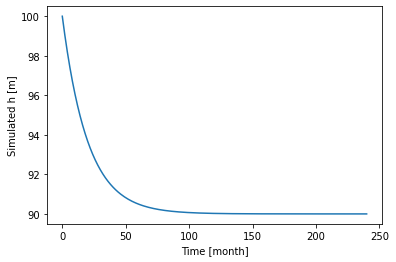

In [119]:
sy = 0.01
pd = 0.05 # parameter for discharge, 0 means no discharge
hmin = 90 # Discharge is zero, if groundwater table is below this level
rf = 0

Q = np.zeros(max_t,)

h = np.empty(max_t+1,)
h[0] = 100 # intial condition

for i in range(max_t):
  tspan = [i,i+1]
  # solve for next step
  h[i+1] = odeint(ambhas_model,h[i],tspan,args=(rf,sy,hmin,pd,rain[i],Q[i]), hmax=0.1)[1]
  
plt.plot(h)
plt.xlabel("Time [month]")
plt.ylabel("Simulated h [m]")
plt.show()

Since, recharge is 0, and only discharge is taking place, $h$ is decreasing over time. Notice the minimum value that $h$ has got – $h_{min}$.

### $h_{min}$
Let us increase the $h_{min}$ beyond the $h_0$ (initial groundwater level):



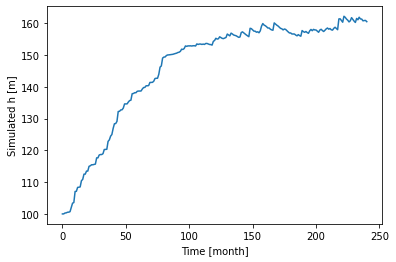

In [120]:
sy = 0.01
pd = 0.05 # parameter for discharge, 0 means no discharge
hmin = 150 # Discharge is zero, if groundwater table is below this level
rf = 0.1

Q = np.zeros(max_t,)

h = np.empty(max_t+1,)
h[0] = 100 # intial condition

for i in range(max_t):
  tspan = [i,i+1]
  # solve for next step
  h[i+1] = odeint(ambhas_model,h[i],tspan,args=(rf,sy,hmin,pd,rain[i],Q[i]), hmax=0.1)[1]
  
plt.plot(h)
plt.xlabel("Time [month]")
plt.ylabel("Simulated h [m]")
plt.show()

Since in the beginning, $h$ is lower than the $h_{min}$, there is no discharge. If there is any recharge, then net input will be always positive and hence $h$ is increasing over time. After a certain period of time discharge approximately matches the recharge and fluctuations in $h$ starts stabilizing.

Let us decrease hmin to the possible lowest value:

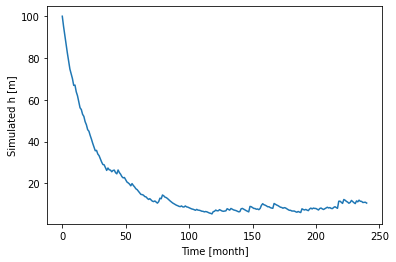

In [121]:
sy = 0.01
pd = 0.05 # parameter for discharge, 0 means no discharge
hmin = 0 # Discharge is zero, if groundwater table is below this level
rf = 0.1

Q = np.zeros(max_t,)

h = np.empty(max_t+1,)
h[0] = 100 # intial condition

for i in range(max_t):
  tspan = [i,i+1]
  # solve for next step
  h[i+1] = odeint(ambhas_model,h[i],tspan,args=(rf,sy,hmin,pd,rain[i],Q[i]), hmax=0.1)[1]
  
plt.plot(h)
plt.xlabel("Time [month]")
plt.ylabel("Simulated h [m]")
plt.show()

A decrease in $h_{min}$ means, there is more water to go as the discharge and hence higher the discharge, which can be seen in the figure.

### 3.4 pd
To understand the impact of $pd$, let us try two extreme values of $pd$:

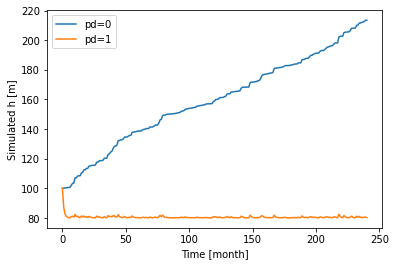

In [122]:
pd1 = 0.0 # lowest value
pd2 = 1.0 # another value

sy = 0.01
hmin = 80 # Discharge is zero, if groundwater table is below this level
rf = 0.1

Q = np.zeros(max_t,)

h1 = np.empty(max_t+1,)
h1[0] = 100 

h2 = np.empty(max_t+1,)
h2[0] = 100 

for i in range(max_t):
  tspan = [i,i+1]
  # solve for next step
  h1[i+1] = odeint(ambhas_model,h1[i],tspan,args=(rf,sy,hmin,pd1,rain[i],Q[i]), hmax=0.1)[1]
  h2[i+1] = odeint(ambhas_model,h2[i],tspan,args=(rf,sy,hmin,pd2,rain[i],Q[i]), hmax=0.1)[1]

plt.plot(h1, label="pd=0")
plt.plot(h2, label="pd=1")
plt.xlabel("Time [month]")
plt.ylabel("Simulated h [m]")
plt.legend(loc="best")
plt.show()

These are the simulated maximum and minimum $h$ due to the variation in $pd$. When $pd$ is equal to 0, it means that there is no discharge and when $pd$ is equal to 1, it means that all the water is going as discharge (hence ground water level suddenly drops to $h_{min}$).

### Summary

While trying to fit the parameters of the ambahs groundwater model, it is better to think in terms of fluxes (recharge and discharge) first. Try to find
out if:

* discharge >> recharge, or
* discharge << recharge.

Then see which parametrs should be fitted to match the required balance of fluxes.

Another important thing to look into the simulated $h$ is the magnitude of fluctuations. These can be controlled by the $rf$ and $S_y$ only. Also remember that $rf$ also controls the recharge and $S_y$ controls the discharge.
